<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/Assignment_K_Means_Clustering_Customer_EastWestAirlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Head:
    ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0   1    28143           0          1          1          1          174   
1   2    19244           0          1          1          1          215   
2   3    41354           0          1          1          1         4123   
3   4    14776           0          1          1          1          500   
4   5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
0            1                  0                0               7000      0  
1            2                  0                0               6968      0  
2            4                  0                0               7034      0  
3            1                  0                0               6952      0  
4           26               2077                4               6935      1  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>


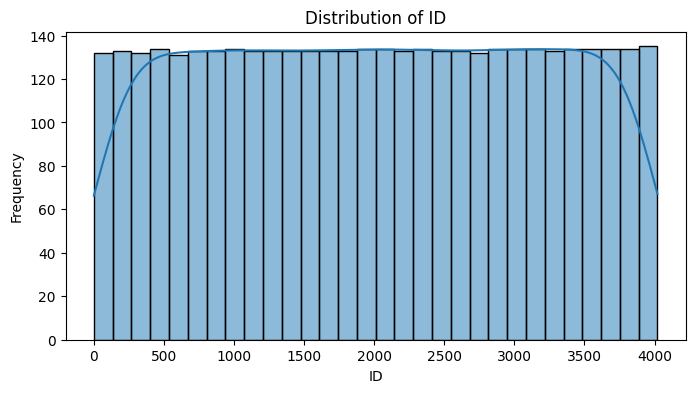

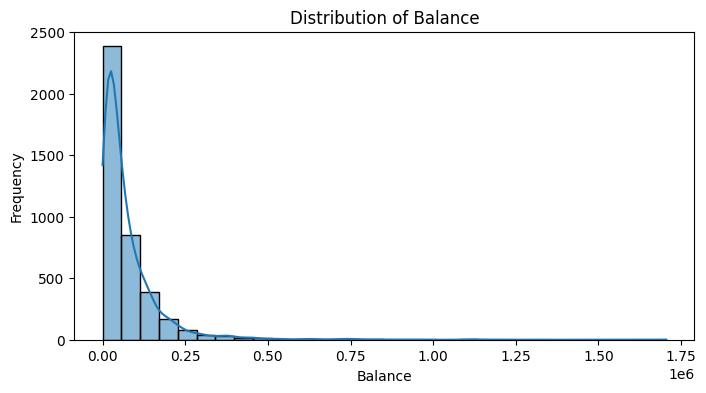

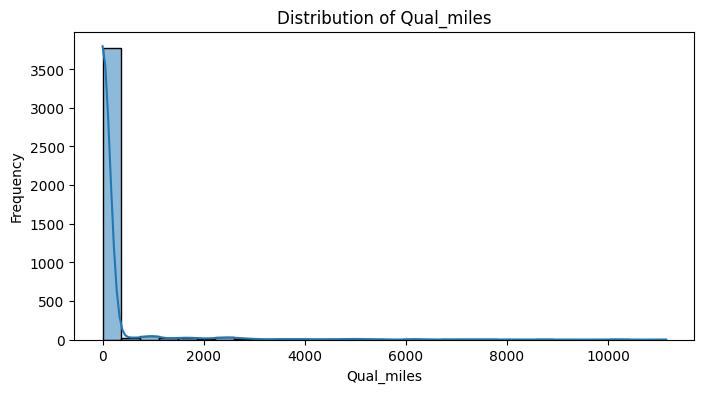

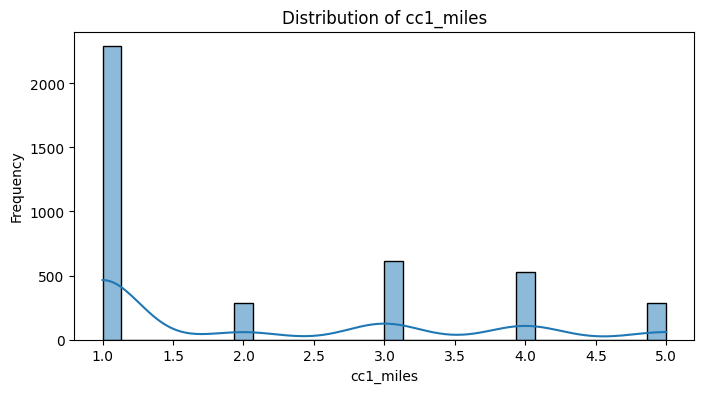

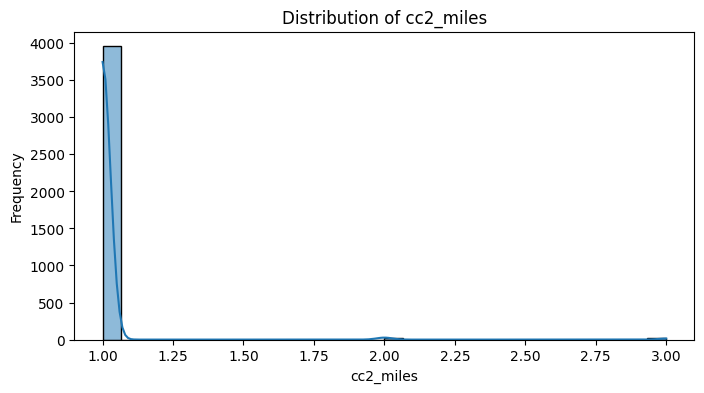

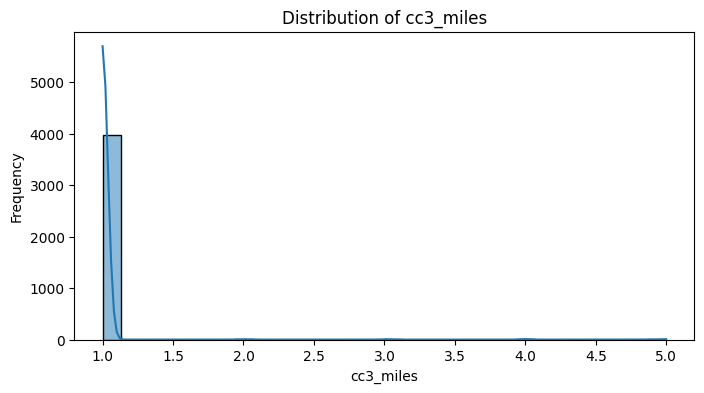

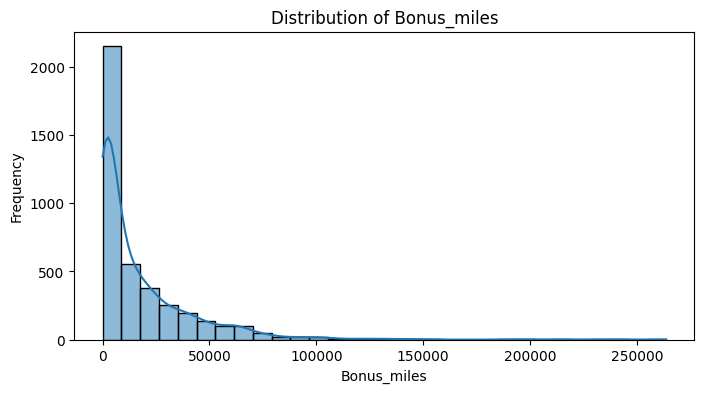

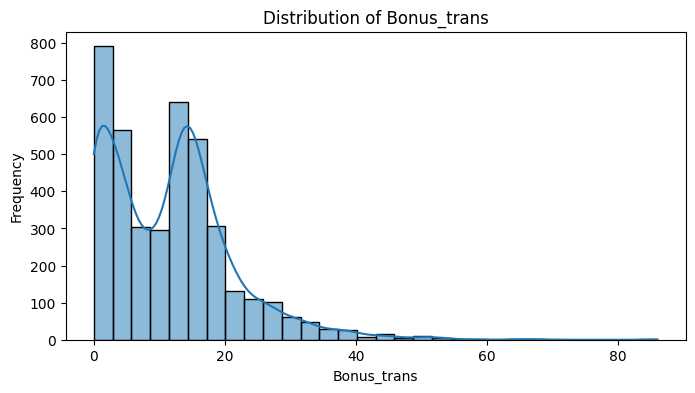

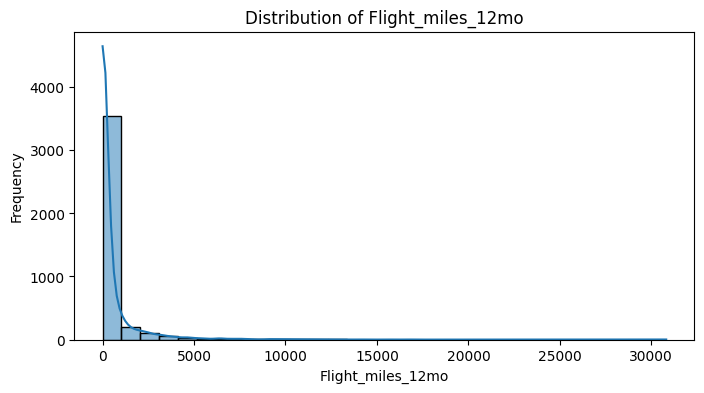

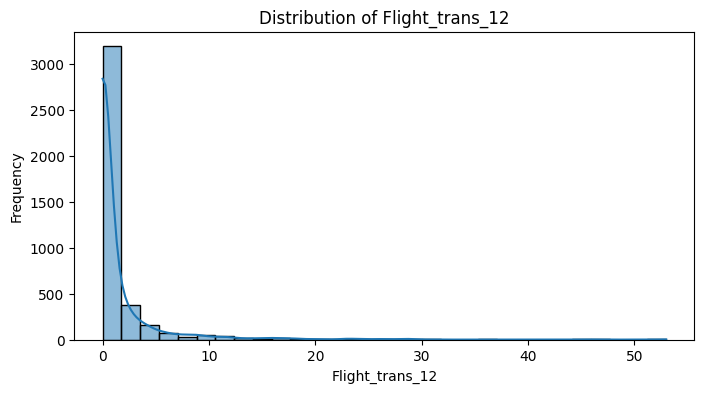

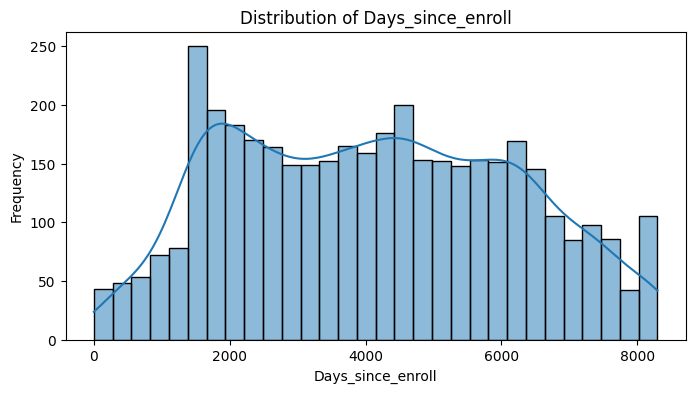

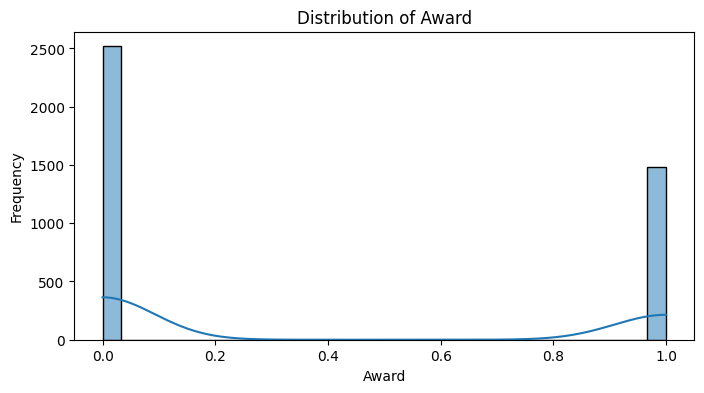

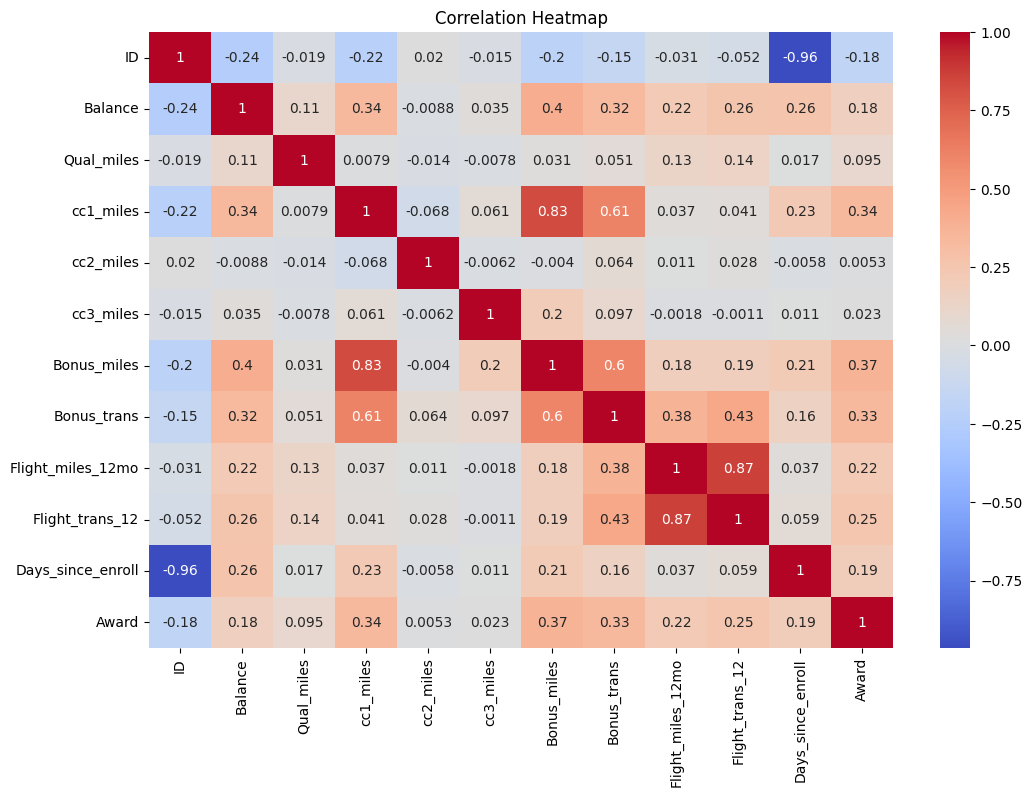

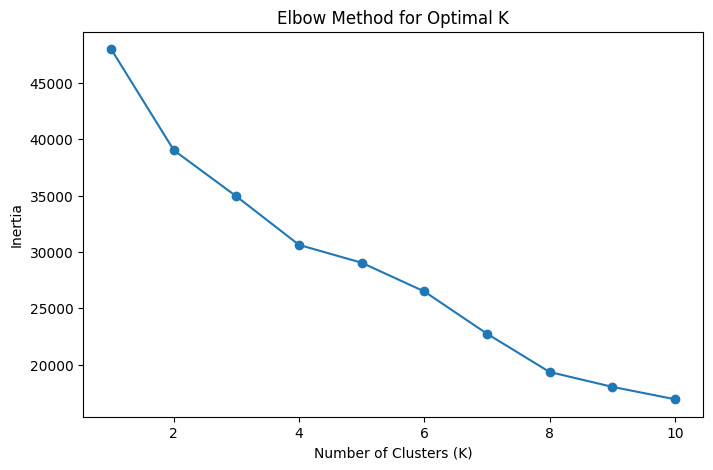

Silhouette Score for K=3: 0.20


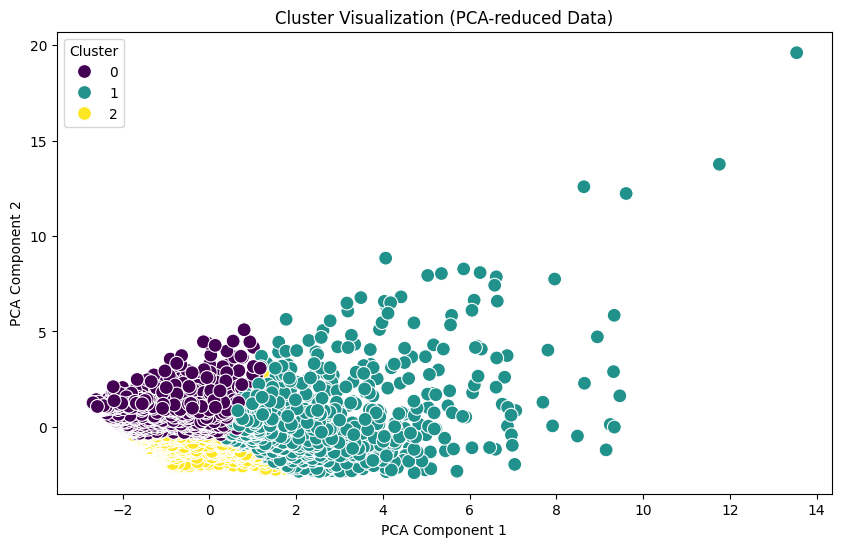


Cluster Summary:
                   ID        Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                 
0        3111.388308   40980.913231  105.005538   1.444308   1.016615   
1        1533.872934  150218.949380  297.365702   3.833678   1.007231   
2        1078.568990   58553.187767   83.805121   1.549075   1.017070   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                            
0         1.001846   6917.616000     8.138462         237.179692   
1         1.046488  48249.512397    21.637397        1197.568182   
2         1.000711   7550.203414     8.695590         209.886202   

         Flight_trans_12  Days_since_enroll     Award  
Cluster                                                
0               0.691077        2196.562462  0.225231  
1               3.589876        4983.925620  0.750000  
2               0.636558        5744.142959  0.276

In [2]:
# Step 1: Setup and Data Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
# The dataset contains information on airline customers. Update the file path to point to the dataset location.
file_path = "/content/EastWestAirlines.csv"  # Update with the correct file path
data = pd.read_csv(file_path)

# Display the first 5 rows of the dataset to understand its structure and content.
print("Dataset Head:\n", data.head())

# Display detailed information about the dataset, including column names, data types, and null values.
# This helps in identifying missing data and understanding data types for preprocessing.
print("\nDataset Info:\n")
data.info()

# Handle missing values (if any)
# Use the isnull() method to identify missing values and drop rows with null values to ensure clean data.
print("\nMissing Values:\n", data.isnull().sum())
data = data.dropna()

# Step 2: Data Exploration
# Explore the dataset to understand patterns, distributions, and relationships among the features.

# Identify numeric columns to focus on for clustering and visualization.
# Selects columns with numeric data types for analysis.
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Visualize the distribution of each numeric column to understand the data's spread, central tendency, and outliers.
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Correlation heatmap
# Displays the pairwise correlation of numeric features using a heatmap.
# This helps identify which features are strongly related (positively or negatively) and might influence clustering.
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 3: Preprocessing and Parameter Selection
# K-Means clustering is sensitive to feature scales, so we standardize the data to bring all features to the same scale.

# StandardScaler standardizes features by removing the mean and scaling to unit variance.
# This ensures that features with larger scales do not dominate the clustering process.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_columns])

# Step 4: K-Means Clustering
# Find the optimal number of clusters (K) using the Elbow Method.
# The Elbow Method plots the sum of squared distances (inertia) for different K values to identify the optimal K.

# Initialize a list to store inertia values for each K.
inertia = []
K = range(1, 11)  # Test K values from 1 to 10

# Loop through each value of K, fit the K-Means model, and calculate inertia.
for k in K:
    # n_clusters: Number of clusters.
    # init: Initialization method for centroids. 'k-means++' selects initial cluster centers smartly.
    # random_state: Ensures reproducibility of the results.
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
# The "elbow point" (where the curve bends) indicates the optimal number of clusters.
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Step 5: Choose K based on the elbow point (e.g., K=3)
# Use the selected number of clusters to fit the final K-Means model.
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)  # Predict cluster labels for each data point.

# Add the cluster labels as a new column in the original dataset for analysis.
data['Cluster'] = cluster_labels

# Evaluate clustering performance using the silhouette score.
# Silhouette score measures how similar a data point is to its own cluster compared to other clusters.
# A score closer to 1 indicates well-separated clusters; closer to 0 indicates overlapping clusters.
sil_score = silhouette_score(data_scaled, cluster_labels)
print(f"Silhouette Score for K={optimal_k}: {sil_score:.2f}")

# Step 6: Cluster Analysis
# Visualize clusters using PCA (Principal Component Analysis) to reduce dimensions for 2D visualization.

from sklearn.decomposition import PCA

# PCA reduces the dimensionality of the data while retaining most of the variance.
# n_components=2 reduces the data to 2 dimensions for easy plotting.
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Scatter plot of clusters in 2D space
# Points are colored by their cluster labels, and PCA components are used as axes.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cluster_labels, palette="viridis", s=100)
plt.title("Cluster Visualization (PCA-reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Analyze the characteristics of each cluster
# Group the data by cluster labels and calculate the mean for each numeric feature.
# This helps identify distinguishing characteristics of each cluster.
cluster_summary = data.groupby('Cluster').mean()
print("\nCluster Summary:\n", cluster_summary)

# Save the clustered data to a CSV file
# This allows you to use the clustered dataset for further analysis or reporting.
data.to_csv("Clustered_EastWestAirlines.csv", index=False)
print("Clustered data saved as 'Clustered_EastWestAirlines.csv'.")
